In [1]:
import json
import json_helper as jhlp
import matplotlib.pyplot as plt
import os
%matplotlib inline
import random as rnd
import numpy as np
from rake_topic_extraction import Rake
topic_extractor = Rake('SmartStoplist.txt')

In [4]:
movies = ['A Few Good Men', '127 Hours', 'Avengers, The', 'Departed, The', 'Fight Club', 'Gladiator']
json_path = '/home/vishi/imsdb/json'
movie_jsons = [json_path+'/'+movie+'.json' for movie in movies]
script_dicts = []
for movie_json in movie_jsons:
    with open(movie_json) as f:
        script_dicts.append(json.loads(f.read()))

In [2]:
def get_scene_weight(script_keywords, scene):
    keyword_extractor = Rake('SmartStoplist.txt')
    scene_keywords = keyword_extractor.run(jhlp.get_description_for_scene(scene))
    weight = len([1 for w in script_keywords if w in scene_keywords])
    return weight

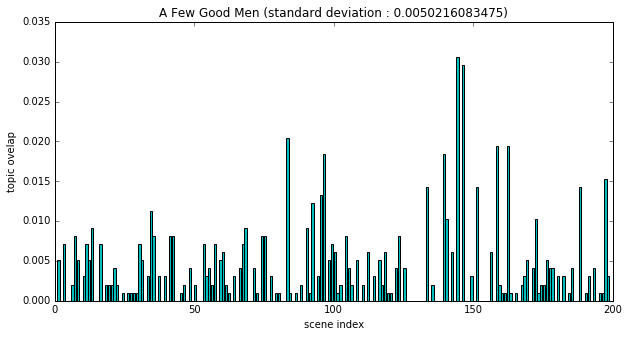

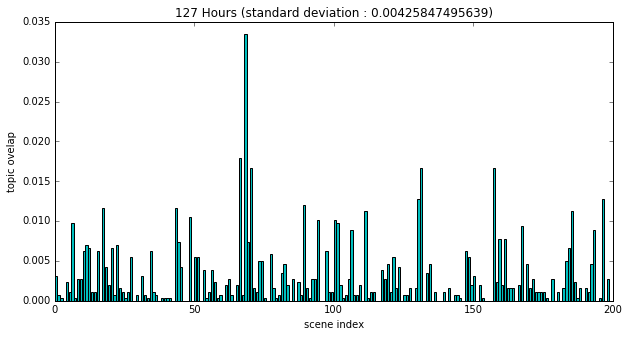

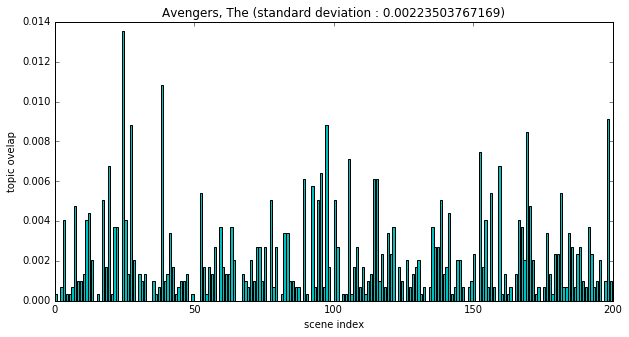

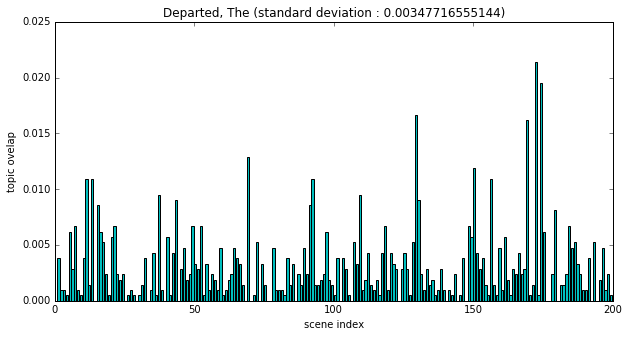

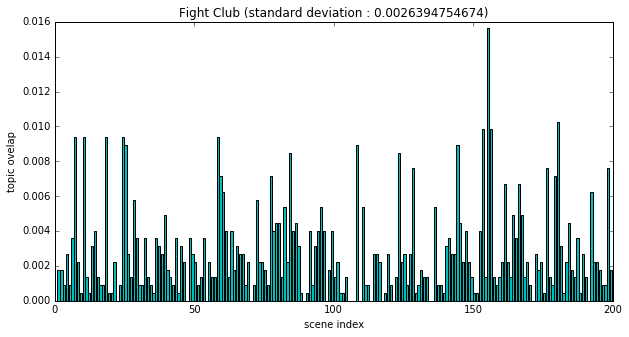

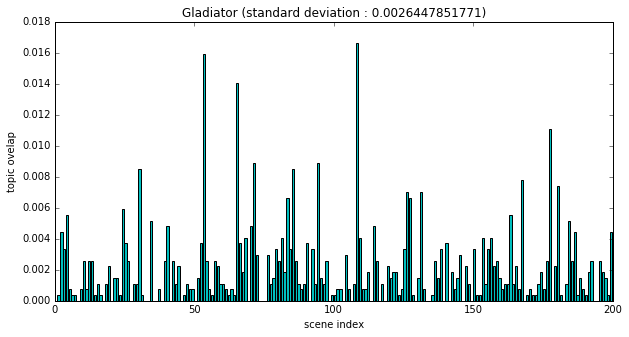

In [10]:
width = 0.8
for i, script_dict in enumerate(script_dicts):
    script_keywords = topic_extractor.run(jhlp.get_description_for_script(script_dict))
    weights = []
    for key in script_dict:
        scene = script_dict[key]
        weights.append(get_scene_weight(script_keywords, scene))
    while len(weights) > 200:
        rid = rnd.randint(0, len(weights)-3)
        weights[rid:rid+2] = [sum(weights[rid:rid+2])]
    weights = [float(weight)/len(script_keywords) for weight in weights]
    
    #print movies[i], "standard deviation :", np.std(weights)
    plt.figure(figsize=(10,5))
    bplot = plt.bar(range(200), weights, width, color='c')
    plt.xlabel('scene index')
    plt.ylabel('topic ovelap')
    plt.title(movies[i] + " (standard deviation : " + str(np.std(weights)) + ")")
    
    #top_weights = sorted(weights, reverse=True)[:15]
    #for w in top_weights:
        #bplot[weights.index(w)].set_color('r')
    
    plt.show()
    
#what metrics can be used to get the distribution between two characters?
#for something like a norm.euclidean distance we need to normalize these values

In [31]:
np.std([1,2,3])

0.81649658092772603

In [6]:
movie_dicts = []
json_files = [json_path+'/'+fname for fname in os.listdir(json_path)]
for json_file in json_files:
    with open(json_file) as f:
        movie_dicts.append(json.loads(f.read()))

In [7]:
distributions = []
for script_dict in movie_dicts:
    if len(script_dict.keys()) < 200:
        continue
    
    script_keywords = topic_extractor.run(jhlp.get_description_for_script(script_dict))
    weights = []
    for key in script_dict:
        scene = script_dict[key]
        weights.append(get_scene_weight(script_keywords, scene))
    while len(weights) > 200:
        rid = rnd.randint(0, len(weights)-3)
        weights[rid:rid+2] = [sum(weights[rid:rid+2])]
    weights = [float(weight)/len(script_keywords) for weight in weights]
    distributions.append(weights)    

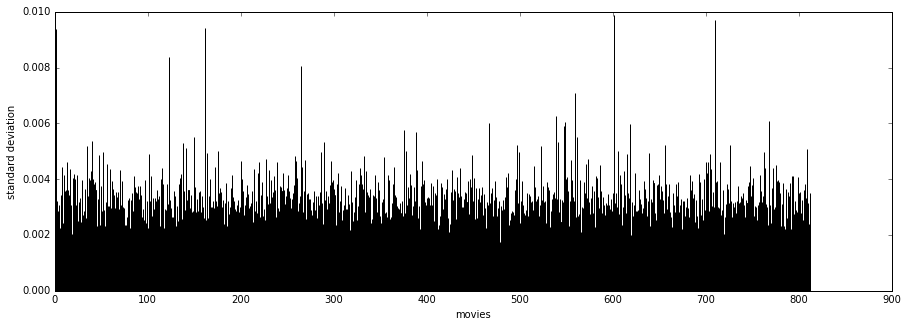

In [12]:
std_dev = [np.std(weights) for weights in distributions]
plt.figure(figsize=(15,5))
plt.bar(range(len(std_dev)), std_dev, width=0.01, color='c')    
plt.xlabel('movies')
plt.ylabel('standard deviation')
plt.show()

In [70]:
#deviation of deviation
print np.std(std_dev)

0.000876476692731


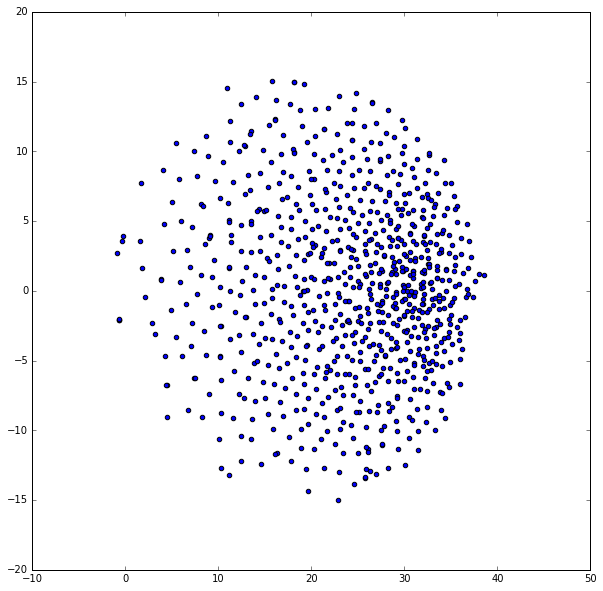

In [91]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, random_state=0)
tsne_op = tsne_model.fit_transform(np.array([[w for w in d] for d in distributions]))
plt.figure(figsize=(10,10))
plt.scatter(tsne_op[:,0], tsne_op[:,1])
plt.show()